In [1]:
import tensorflow as tf
import pandas as pd

In [35]:
diabetes=pd.read_csv('pima-indians-diabetes.csv')

In [36]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [37]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [38]:
cols=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [39]:
diabetes[cols]=diabetes[cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [40]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [41]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [42]:
group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [43]:
import matplotlib.pyplot as plt

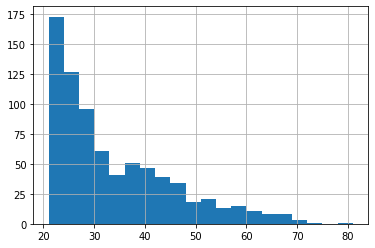

In [44]:
diabetes['Age'].hist(bins=20)

In [45]:
age_range=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [46]:
labels=diabetes['Class']
X_data=diabetes.drop(labels=['Class'],axis=1)


In [48]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,group, age_range]

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_data,labels,test_size=.3,random_state=101)

In [52]:
classifier=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmptcgiwghx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a37be2cc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
input_fn=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [55]:
classifier.train(input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmptcgiwghx/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 345.331
INFO:tensorflow:loss = 4.574113, step = 101 (0.289 sec)
INFO:tensorflow:global_step/sec: 714.438
INFO:tensorflow:loss = 5.021726, step = 201 (0.140 sec)
INFO:tensorflow:global_step/sec: 710.183
INFO:tensorflow:loss = 3.5156918, step = 301 (0.142 sec)
INFO:tensorflow:global_step/sec: 703.398
INFO:tensorflow:loss = 4.361726, step = 401 (0.142 sec)
INFO:tensorflow:global_step/sec: 720.741
INFO:tensorflow:loss = 5.343522, step = 501 (0.140 sec)
INFO:tensorflow:global_step/sec: 718.179
INFO:tensorflow:loss = 4.123903, step = 601 (0.139 sec)
INFO:tensorflow:glo

In [56]:
eval_input_fn=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
result=classifier.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-13-16:47:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmptcgiwghx/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-13-16:47:23
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80415636, auc_precision_recall = 0.6483841, average_loss = 0.5242548, global_step = 1000, label/mean = 0.35064936, loss = 5.0459523, precision = 0.64788735, prediction/mean = 0.37245312, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmptcgiwghx/model.ckpt-1000


In [57]:
result

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80415636,
 'auc_precision_recall': 0.6483841,
 'average_loss': 0.5242548,
 'label/mean': 0.35064936,
 'loss': 5.0459523,
 'precision': 0.64788735,
 'prediction/mean': 0.37245312,
 'recall': 0.56790125,
 'global_step': 1000}

In [58]:
pred_input_fn=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1000,shuffle=False)
predictions=classifier.predict(pred_input_fn)

In [60]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmptcgiwghx/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.12320173], dtype=float32),
  'logistic': array([0.53076154], dtype=float32),
  'probabilities': array([0.46923846, 0.53076154], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.632974], dtype=float32),
  'logistic': array([0.65316355], dtype=float32),
  'probabilities': array([0.3468365 , 0.65316355], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.5744425], dtype=float32),
  'logistic': array([0.36021236], dtype=float32),
  'probabilities': array([0.6397876, 0.3602124], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6162581], dtype=float32),
  'logistic': array([0.350633], dtype=float32),
  'probabilities': array([0.64936703, 0.35063297], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6948], dtype=float32),
  'logistic': array([

# DNN

In [62]:
embedded_col=tf.feature_column.embedding_column(group,dimension=4)
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_col, age_range]

In [63]:
dnnclassifier=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpuk19hx_g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4372c2b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
dnnclassifier.train(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpuk19hx_g/model.ckpt.
INFO:tensorflow:loss = 6.8774786, step = 1
INFO:tensorflow:global_step/sec: 380.668
INFO:tensorflow:loss = 5.0139294, step = 101 (0.266 sec)
INFO:tensorflow:global_step/sec: 680.818
INFO:tensorflow:loss = 6.420831, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 697.993
INFO:tensorflow:loss = 8.1822195, step = 301 (0.144 sec)
INFO:tensorflow:global_step/sec: 647.37
INFO:tensorflow:loss = 5.865292, step = 401 (0.153 sec)
INFO:tensorflow:global_step/sec: 728.938
INFO:tensorflow:loss = 6.627018, step = 501 (0.138 sec)
INFO:tensorflow:global_step/sec: 653.756
INFO:tensorflow:loss = 3.681558, step = 601 (0.154 sec)
INFO:tensorflow:gl

INFO:tensorflow:loss = 4.3424726, step = 8001 (0.168 sec)
INFO:tensorflow:global_step/sec: 625.637
INFO:tensorflow:loss = 5.2752295, step = 8101 (0.157 sec)
INFO:tensorflow:global_step/sec: 697.641
INFO:tensorflow:loss = 3.6557372, step = 8201 (0.145 sec)
INFO:tensorflow:global_step/sec: 710.823
INFO:tensorflow:loss = 3.9328578, step = 8301 (0.138 sec)
INFO:tensorflow:global_step/sec: 739.114
INFO:tensorflow:loss = 1.1307722, step = 8401 (0.136 sec)
INFO:tensorflow:global_step/sec: 715.487
INFO:tensorflow:loss = 3.41396, step = 8501 (0.140 sec)
INFO:tensorflow:global_step/sec: 738.079
INFO:tensorflow:loss = 5.699235, step = 8601 (0.136 sec)
INFO:tensorflow:global_step/sec: 704.057
INFO:tensorflow:loss = 3.4872737, step = 8701 (0.140 sec)
INFO:tensorflow:global_step/sec: 737.61
INFO:tensorflow:loss = 1.7813188, step = 8801 (0.136 sec)
INFO:tensorflow:global_step/sec: 713.583
INFO:tensorflow:loss = 3.303412, step = 8901 (0.140 sec)
INFO:tensorflow:global_step/sec: 757.702
INFO:tensorflow

INFO:tensorflow:global_step/sec: 706.115
INFO:tensorflow:loss = 1.4690219, step = 16301 (0.143 sec)
INFO:tensorflow:global_step/sec: 687.365
INFO:tensorflow:loss = 2.4898357, step = 16401 (0.144 sec)
INFO:tensorflow:global_step/sec: 692.742
INFO:tensorflow:loss = 3.772676, step = 16501 (0.146 sec)
INFO:tensorflow:global_step/sec: 695.091
INFO:tensorflow:loss = 4.756801, step = 16601 (0.144 sec)
INFO:tensorflow:global_step/sec: 680.097
INFO:tensorflow:loss = 1.3607591, step = 16701 (0.147 sec)
INFO:tensorflow:global_step/sec: 676.099
INFO:tensorflow:loss = 0.57459086, step = 16801 (0.148 sec)
INFO:tensorflow:global_step/sec: 700.051
INFO:tensorflow:loss = 3.3004718, step = 16901 (0.143 sec)
INFO:tensorflow:global_step/sec: 666.458
INFO:tensorflow:loss = 1.8586406, step = 17001 (0.147 sec)
INFO:tensorflow:global_step/sec: 743.091
INFO:tensorflow:loss = 2.559146, step = 17101 (0.136 sec)
INFO:tensorflow:global_step/sec: 695.381
INFO:tensorflow:loss = 0.97033745, step = 17201 (0.142 sec)
I

INFO:tensorflow:loss = 3.6486773, step = 24501 (0.153 sec)
INFO:tensorflow:global_step/sec: 668.052
INFO:tensorflow:loss = 1.3001215, step = 24601 (0.149 sec)
INFO:tensorflow:global_step/sec: 666.839
INFO:tensorflow:loss = 2.990677, step = 24701 (0.151 sec)
INFO:tensorflow:global_step/sec: 651.561
INFO:tensorflow:loss = 3.5913546, step = 24801 (0.155 sec)
INFO:tensorflow:global_step/sec: 608.572
INFO:tensorflow:loss = 2.9388254, step = 24901 (0.164 sec)
INFO:tensorflow:global_step/sec: 630.377
INFO:tensorflow:loss = 0.9302325, step = 25001 (0.155 sec)
INFO:tensorflow:global_step/sec: 664.89
INFO:tensorflow:loss = 2.9243124, step = 25101 (0.152 sec)
INFO:tensorflow:global_step/sec: 658.393
INFO:tensorflow:loss = 2.9291022, step = 25201 (0.151 sec)
INFO:tensorflow:global_step/sec: 677.094
INFO:tensorflow:loss = 5.6944, step = 25301 (0.149 sec)
INFO:tensorflow:global_step/sec: 685.11
INFO:tensorflow:loss = 2.4443028, step = 25401 (0.144 sec)
INFO:tensorflow:global_step/sec: 681.933
INFO:t

INFO:tensorflow:global_step/sec: 672.721
INFO:tensorflow:loss = 2.9838521, step = 32801 (0.149 sec)
INFO:tensorflow:global_step/sec: 685.382
INFO:tensorflow:loss = 2.454647, step = 32901 (0.149 sec)
INFO:tensorflow:global_step/sec: 659.408
INFO:tensorflow:loss = 0.7948215, step = 33001 (0.150 sec)
INFO:tensorflow:global_step/sec: 644.833
INFO:tensorflow:loss = 4.687928, step = 33101 (0.156 sec)
INFO:tensorflow:global_step/sec: 638.203
INFO:tensorflow:loss = 0.9111968, step = 33201 (0.155 sec)
INFO:tensorflow:global_step/sec: 674.204
INFO:tensorflow:loss = 1.6248958, step = 33301 (0.148 sec)
INFO:tensorflow:global_step/sec: 642.801
INFO:tensorflow:loss = 5.905694, step = 33401 (0.156 sec)
INFO:tensorflow:global_step/sec: 676.05
INFO:tensorflow:loss = 2.683432, step = 33501 (0.150 sec)
INFO:tensorflow:global_step/sec: 647.904
INFO:tensorflow:loss = 3.0075676, step = 33601 (0.154 sec)
INFO:tensorflow:global_step/sec: 664.611
INFO:tensorflow:loss = 3.43385, step = 33701 (0.150 sec)
INFO:te

INFO:tensorflow:loss = 3.7024498, step = 41001 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.488
INFO:tensorflow:loss = 1.7371063, step = 41101 (0.158 sec)
INFO:tensorflow:global_step/sec: 670.313
INFO:tensorflow:loss = 0.23762167, step = 41201 (0.151 sec)
INFO:tensorflow:global_step/sec: 632.055
INFO:tensorflow:loss = 3.305506, step = 41301 (0.159 sec)
INFO:tensorflow:global_step/sec: 611.261
INFO:tensorflow:loss = 3.5430148, step = 41401 (0.161 sec)
INFO:tensorflow:global_step/sec: 678.63
INFO:tensorflow:loss = 3.3049293, step = 41501 (0.151 sec)
INFO:tensorflow:global_step/sec: 661.126
INFO:tensorflow:loss = 1.7327604, step = 41601 (0.151 sec)
INFO:tensorflow:global_step/sec: 647.395
INFO:tensorflow:loss = 6.2567863, step = 41701 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.535
INFO:tensorflow:loss = 1.6390598, step = 41801 (0.152 sec)
INFO:tensorflow:global_step/sec: 665.012
INFO:tensorflow:loss = 1.6687756, step = 41901 (0.150 sec)
INFO:tensorflow:global_step/sec: 643.29
IN

INFO:tensorflow:global_step/sec: 657.608
INFO:tensorflow:loss = 2.111512, step = 49301 (0.151 sec)
INFO:tensorflow:global_step/sec: 647.04
INFO:tensorflow:loss = 2.6643035, step = 49401 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.634
INFO:tensorflow:loss = 2.128327, step = 49501 (0.157 sec)
INFO:tensorflow:global_step/sec: 625.441
INFO:tensorflow:loss = 2.2894027, step = 49601 (0.160 sec)
INFO:tensorflow:global_step/sec: 645.258
INFO:tensorflow:loss = 1.1486007, step = 49701 (0.152 sec)
INFO:tensorflow:global_step/sec: 662.704
INFO:tensorflow:loss = 3.1463518, step = 49801 (0.152 sec)
INFO:tensorflow:global_step/sec: 616.843
INFO:tensorflow:loss = 1.5730848, step = 49901 (0.162 sec)
INFO:tensorflow:global_step/sec: 665.602
INFO:tensorflow:loss = 1.8991342, step = 50001 (0.153 sec)
INFO:tensorflow:global_step/sec: 645.14
INFO:tensorflow:loss = 2.6679137, step = 50101 (0.152 sec)
INFO:tensorflow:global_step/sec: 646.877
INFO:tensorflow:loss = 5.000108, step = 50201 (0.155 sec)
INFO:

In [65]:
result=dnnclassifier.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-13-17:09:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpuk19hx_g/model.ckpt-53700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-13-17:09:05
INFO:tensorflow:Saving dict for global step 53700: accuracy = 0.7186147, accuracy_baseline = 0.64935064, auc = 0.773251, auc_precision_recall = 0.64998424, average_loss = 0.9735832, global_step = 53700, label/mean = 0.35064936, loss = 9.370738, precision = 0.597561, prediction/mean = 0.34824023, recall = 0.60493827
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 53700: /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpuk19hx_g/model.ckpt-53700


In [66]:
result

{'accuracy': 0.7186147,
 'accuracy_baseline': 0.64935064,
 'auc': 0.773251,
 'auc_precision_recall': 0.64998424,
 'average_loss': 0.9735832,
 'label/mean': 0.35064936,
 'loss': 9.370738,
 'precision': 0.597561,
 'prediction/mean': 0.34824023,
 'recall': 0.60493827,
 'global_step': 53700}